In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import sympy
from sympy import symbols, Eq, solve
from sympy import simplify
from utils import plot_map, tangent_line, xy_to_parametric_form
import numpy as np

### QZ are circles, with (x,y) coordinates and radius (r) given.

In [17]:
Map_qz = [(0.0,0.0,6.0), (12.0,10.0,4.0)]
start = (-5,-5)
goal = (15,15)

(0.0, 0.0, 6.0)
(12.0, 10.0, 4.0)


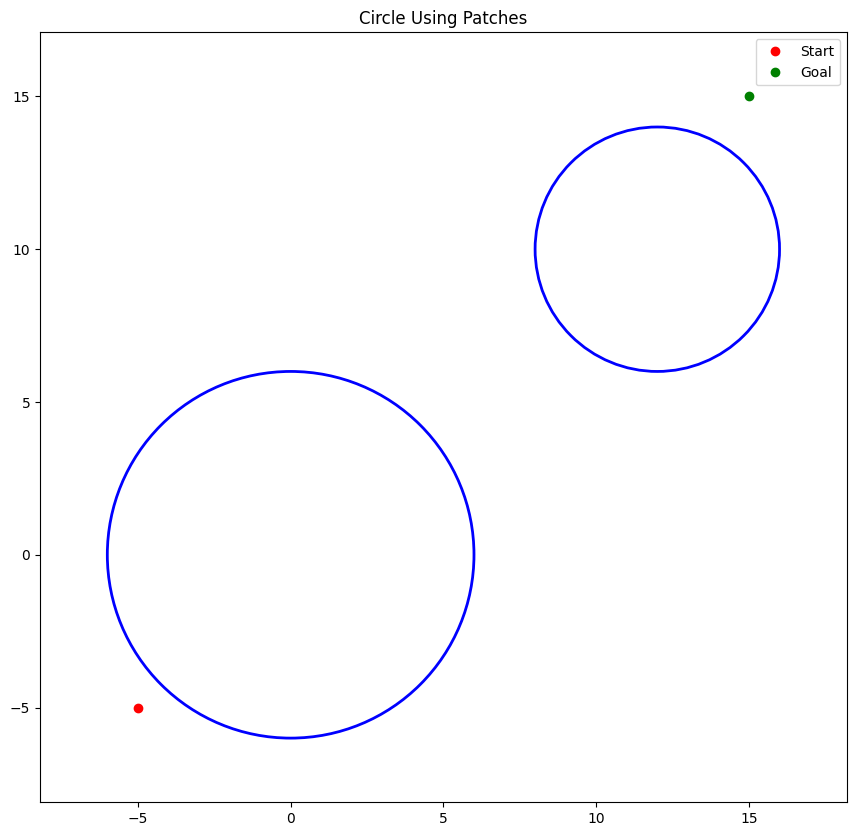

In [18]:
from utils import plot_map

plot_circle = plot_map(Map_qz, start, goal)

plot_circle.plot_map_circle(tangents=False)

In [19]:
tangent_object = tangent_line(Map_qz, start, goal)
plot_object = plot_map(Map_qz, start, goal)

tangents_and_circles_list = tangent_object.tangent_from_multiple_points_to_circles([start,goal])
tangents_and_circles_list.append(tangent_object.common_tangents(Map_qz[0], Map_qz[1]))

In [33]:
tangents_and_circles_list

[[{'line_eq': {'a': -4.31363130187670, 'b': -1, 'c': -26.5681565093835},
   'tangent_point_circle1': (-5, -5),
   'tangent_point_circle2': (-5.84499443206437, -1.35500556793563),
   'circle1': (-5, -5, 0),
   'circle2': (0.0, 0.0, 6.0),
   'tangent_type': 'point2circle',
   'parameter_circle1': 0,
   'parameter_circle2': 0.227799336697912 + pi},
  {'line_eq': {'a': -0.231823243577850, 'b': -1, 'c': -6.15911621788925},
   'tangent_point_circle1': (-5, -5),
   'tangent_point_circle2': (-1.35500556793564, -5.84499443206436),
   'circle1': (-5, -5, 0),
   'circle2': (0.0, 0.0, 6.0),
   'tangent_type': 'point2circle',
   'parameter_circle1': 0,
   'parameter_circle2': 1.34299699009698 + pi}],
 [{'line_eq': {'a': -4.56722324978245, 'b': -1, 'c': 83.5083487467367},
   'tangent_point_circle1': (15, 15),
   'tangent_point_circle2': (15.9074356983055, 10.8555385810167),
   'circle1': (15, 15, 0),
   'circle2': (12.0, 10.0, 4.0),
   'tangent_type': 'point2circle',
   'parameter_circle1': 0,
   'p

In [20]:
# from utils import plot_map

# plot_circle = plot_map(Map_qz, start, goal)

# plot_circle.plot_map_circle(tangents=False)

In [21]:
### Converting to parametric form
for i in range(len(tangents_and_circles_list)):
    if len(tangents_and_circles_list[i]) == 2:
        for j in range(len(tangents_and_circles_list[i])):
            point = tangents_and_circles_list[i][j]["tangent_point_circle2"]
            circle =  tangents_and_circles_list[i][j]["circle2"]
            tangents_and_circles_list[i][j]["parameter_circle1"] = 0
            tangents_and_circles_list[i][j]["parameter_circle2"] = xy_to_parametric_form(circle, point)

    elif len(tangents_and_circles_list[i]) == 4:
        for j in range(len(tangents_and_circles_list[i])):
            point1 = tangents_and_circles_list[i][j]["tangent_point_circle1"]
            circle1 =  tangents_and_circles_list[i][j]["circle1"]
            tangents_and_circles_list[i][j]["parameter_circle1"] = xy_to_parametric_form(circle1, point1)
            
            point2 = tangents_and_circles_list[i][j]["tangent_point_circle2"]
            circle2 =  tangents_and_circles_list[i][j]["circle2"]
            tangents_and_circles_list[i][j]["parameter_circle2"] = xy_to_parametric_form(circle2, point2)

In [37]:
### Mapping from index to actual values
index_map = {"s": (start[0], start[1],0), "g": (goal[0], goal[1], 0)}

for i, cicle in enumerate(Map_qz):
    index_in = str(i+1)+ "_i"
    index_out = str(i+1)+ "_o"
    index_map[index_in] = Map_qz[i]
    index_map[index_out] = Map_qz[i]

### Reverse index map
index_map_simple = {"s": (start[0], start[1],0), "g": (goal[0], goal[1], 0)}
for i, cicle in enumerate(Map_qz):
    index_map_simple[i+1] = Map_qz[i]
reverse_index_map = { value: key for key, value in index_map_simple.items()}

In [64]:
import networkx as nx

### internal and external edges
Visibility_Graph = nx.DiGraph()

### Case 1, direct start to goal
### Line eq for line between start and goal
a = (start[1]-goal[1])/(start[0]-goal[0])
b = -1
c = start[1] - a*start[0]
line = {"a": a, "b": b, "c": c}

if not tangent_object.tangent_intersection(line):
    # external_edges[("s", "g")] = {"s": {"coor":(start,start), "para": (0,0)} , "g": {"coor":(goal,goal), "para": (0,0)} }
    Visibility_Graph.add_edge("s", "g", circle1= (start,start), circle2= (goal,goal), parameter_circle1 = (0,0), parameter_circle2 = (0,0), edge_type="external")

### Case 2, edge between point and a circle
for tangents in tangents_and_circles_list:
    if len(tangents) == 2:
        point1, point2 = tangents[0]["tangent_point_circle2"], tangents[1]["tangent_point_circle2"]
        para_pt1, para_pt2 = tangents[0]["parameter_circle2"], tangents[1]["parameter_circle2"]
        
        circle1_index = reverse_index_map[tangents[0]["circle1"]]
        circle2_index = reverse_index_map[tangents[0]["circle2"]]
        
        if circle1_index == "s":
            circle2_index = str(circle2_index)+ "_i"
            Visibility_Graph.add_edge(circle1_index, circle2_index, circle1= (tangents[0]["circle1"],tangents[0]["circle1"]), circle2= (point1,point2), parameter_circle1=(0,0), parameter_circle2=(para_pt1,para_pt2), edge_type="external")
        elif circle1_index == "g":
            circle2_index = str(circle2_index)+ "_o"
            Visibility_Graph.add_edge(circle2_index, circle1_index, circle2= (point1,point2), circle1= (tangents[0]["circle1"],tangents[0]["circle1"]), parameter_circle2=(para_pt1,para_pt2),  parameter_circle1=(0,0),edge_type="external")
        elif circle2_index == "s":
            circle1_index = str(circle1_index)+ "_i"
            Visibility_Graph.add_edge(circle2_index, circle1_index, circle2= (point1,point2), circle1= (tangents[0]["circle1"],tangents[0]["circle1"]), parameter_circle2= (0,0), parameter_circle1=(para_pt1,para_pt2), edge_type="external")
        elif circle2_index == "g":
            circle1_index = str(circle1_index)+ "_o"
            Visibility_Graph.add_edge(circle1_index, circle2_index, circle1= (tangents[0]["circle1"],tangents[0]["circle1"]), circle2= (point1,point2), parameter_circle1=(para_pt1,para_pt2), parameter_circle2=(0,0), edge_type="external")

### Case 3, edge between two circles
for tangents in tangents_and_circles_list:
    if len(tangents) == 4:
        point1_1, point1_2 = tangents[0]["tangent_point_circle1"], tangents[1]["tangent_point_circle1"]
        para_pt1_1, para_pt1_2 = tangents[0]["parameter_circle1"], tangents[1]["parameter_circle1"]
        
        point2_1, point2_2 = tangents[0]["tangent_point_circle2"], tangents[1]["tangent_point_circle2"]
        para_pt2_1, para_pt2_2 = tangents[0]["parameter_circle2"], tangents[1]["parameter_circle2"]
        
        circle1_index = reverse_index_map[tangents[0]["circle1"]]
        circle2_index = reverse_index_map[tangents[0]["circle2"]]
        
        Visibility_Graph.add_edge(str(circle1_index)+ "_i", str(circle2_index)+ "_o", circle1= (point1_1,point1_2), circle2= (point2_1,point2_2), parameter_circle1=(para_pt1_1,para_pt1_2), parameter_circle2=(para_pt2_1,para_pt2_2), edge_type="external")
        Visibility_Graph.add_edge(str(circle2_index)+ "_i", str(circle1_index)+ "_o", circle2= (point2_1,point2_2), circle1= (point1_1,point1_2), parameter_circle2=(para_pt2_1,para_pt2_2), parameter_circle1=(para_pt1_1,para_pt1_2), edge_type="external")

### Case 4, internal edges
for index in index_map:
    if index != "s" and index != "g":
        if index[-1:] == "i":
            index_in = index[:-2] + "_i"
            index_out = index[:-2]+ "_o"
            Visibility_Graph.add_edge(index_in, index_out, edge_type="internal")


In [65]:
# def chord_distance_range(R,
#                          alpha_range,
#                          beta_range,
#                          num_samples=10000):
#     """
#     Compute the min and max perpendicular distance from the center
#     to any chord connecting a point on arc1 = [alpha_min, alpha_max]
#     to a point on arc2 = [beta_min, beta_max].

#     Parameters
#     ----------
#     R : float
#         Radius of the circle (centered at the origin).
#     alpha_range : tuple
#         Bounds of the first arc (angles in radians).
#     beta_range : tulpe
#         Bounds of the second arc (angles in radians).
#     num_samples : int
#         Number of discrete samples to take for the difference Delta.

#     Returns
#     -------
#     (min_dist, max_dist) : tuple of floats
#         The minimum and maximum distance from the center to such a chord.
#     """
#     ### Compute the min and max angles
#     alpha_min, alpha_max = min(alpha_range), max(alpha_range)
#     beta_min, beta_max = min(beta_range), max(beta_range)
    
#     # 1) Compute the range of possible differences (Delta = theta2 - theta1).
#     Delta_min = beta_min  - alpha_max
#     Delta_max = beta_max  - alpha_min

#     # 2) Sample evenly in [Delta_min, Delta_max].
#     Deltas = np.linspace(Delta_min, Delta_max, num_samples)

#     # 3) Evaluate the perpendicular distance for each sample:
#     #    dist(Delta) = R * |cos(Delta/2)|
#     distances = R * np.abs(np.cos(Deltas / 2.0))

#     # 4) Extract min and max from the sampled values.
#     min_dist = np.min(distances)
#     max_dist = np.max(distances)

#     return min_dist, max_dist

In [66]:
external_edges, internal_edges = [], []

for u, v, data in Visibility_Graph.edges(data=True):
    edge_type = data['edge_type']
    if edge_type == "external":
        external_edges.append((u, v))
    else:
        internal_edges.append((u, v))
all_edges = external_edges + internal_edges

In [67]:
internal_edges

[('1_i', '1_o'), ('2_i', '2_o')]

In [68]:
all_edges

[('s', '1_i'),
 ('1_i', '2_o'),
 ('2_o', 'g'),
 ('2_i', '1_o'),
 ('1_i', '1_o'),
 ('2_i', '2_o')]

In [69]:
import numpy as np
import math

def compute_risk_cost(circle, discrete_factor):
    radius = circle[2]
    pen_dist_list = np.linspace(0, radius, discrete_factor+1)
    risk_list = []
    for D in pen_dist_list:
        delta_theta = abs(2*math.acos(D/radius))
        risk = delta_theta/D
        risk_list.append(risk)
        
    return risk_list, pen_dist_list

In [87]:
import gurobipy as gp
import gurobipy as GRB

alpha = 0.5
beta = 0.25
q_min, q_max = 20, 100
### Gurobi optimization
# all_edges = external_edges + internal_edges
model = gp.Model("Convex_Optimization")

discritization_factor = 10
discrite_graph = nx.DiGraph()

for u,v in internal_edges:
    risk_list, pen_dist_list = compute_risk_cost( index_map[u], 10)
    for i in range(discritization_factor):
        discrite_graph.add_edge(u, i, Risk_cost=risk_list[i], pen_dist = pen_dist_list[i])
discrete_edges_cricle = []
for u,v in discrite_graph.edges():
    discrete_edges_cricle.append((u,v))

C:\Users\Saurabh Belgaonkar\AppData\Local\Temp\ipykernel_30604\1458555616.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  risk = delta_theta/D


In [89]:
discrite_graph.edges["1_i",0]["pen_dist"]

0.0

In [90]:
discrete_edges_cricle

[('1_i', 0),
 ('1_i', 1),
 ('1_i', 2),
 ('1_i', 3),
 ('1_i', 4),
 ('1_i', 5),
 ('1_i', 6),
 ('1_i', 7),
 ('1_i', 8),
 ('1_i', 9),
 ('2_i', 0),
 ('2_i', 1),
 ('2_i', 2),
 ('2_i', 3),
 ('2_i', 4),
 ('2_i', 5),
 ('2_i', 6),
 ('2_i', 7),
 ('2_i', 8),
 ('2_i', 9)]

In [91]:

### Create variables
a = model.addVars(all_edges, name="a")
a_t = model.addVars(all_edges, name="a_t")

b = model.addVars(all_edges, lb=0, name="b")

c = model.addVars(all_edges, name="c")
c_t = model.addVars(all_edges, name="c_t")
d = model.addVars(all_edges, name="c")
d_t = model.addVars(all_edges, name="c_t")

Risk = model.addVars(discrete_edges_cricle, name="R")

### intermediate variables
L = model.addVars(all_edges, name="L")
L_inter = model.addVars(discrete_edges_cricle, name="L")
X_bar = model.addVars(all_edges, name="X_bar")
Y_bar = model.addVars(all_edges, name="Y_bar")

model.setObjective(  gp.quicksum(b[i, j] for i, j in all_edges), GRB.MINIMIZE )

y = model.addVars(all_edges, vtype=gp.GRB.BINARY, name="y")
sw = model.addVars(internal_edges, vtype=gp.GRB.BINARY, name="s")
z = model.addVars(discrete_edges_cricle, vtype=gp.GRB.BINARY, name="z")

### Constraints
for i,j in external_edges:
    ### SOC constraint
    model.addConstr( a[i,j] - a_t[i,j] + (alpha+beta)*b[i,j] - alpha*L[i,j] == 0, f"SOC_constraint_outside_quiet_zone_{i}{j}")
    model.addConstr( b[i,j] <= L[i,j], f"Length_min_constraint_{i}{j}")

    ### length constraint
    (circle1x, circle1y, circle1r), (circle2x, circle2y, circle2r) = index_map[i], index_map[j]
    
    X_bar = c[i,j] - c_t[i,j]
    Y_bar = d[i,j] - d_t[i,j]
    
    model.addConstr(X_bar**2 + Y_bar**2 <= (L[i,j])**2,name=f"SOCP_constr_{i}{j}")
    model.addConstr( (c[i,j] - circle1x*y[i,j])**2 + (d[i,j] - circle1y*y[i,j])**2 <= (circle1r*y[i,j])**2, name=f"constr_c_d{i}")
    model.addConstr( (c_t[i,j] - circle2x*y[i,j])**2 + (d_t[i,j] - circle2y*y[i,j])**2 <= (circle2r*y[i,j])**2, name=f"constr_c_d_t{j}")
    
    model.addConstr( a[i,j] >=  q_min*y[i,j], f"a_constraints_max_{i}" )
    model.addConstr( a[i,j] <= q_max*y[i,j], f"a_constraints_min_{i}" )
    model.addConstr( a_t[i,j] >= q_min*y[i,j], f"a_t_constraints_max_{j}" )
    model.addConstr( a_t[i,j] <= q_max*y[i,j], f"a_t_constraints_min_{j}" )
    
for i,j in internal_edges:
    radius = index_map[i][2]
    X_bar = c[i,j] - c_t[i,j]
    Y_bar = d[i,j] - d_t[i,j]
    
    model.addConstr( X_bar**2 + Y_bar**2 <= gp.quicksum(z[i,k]*discrite_graph.edges[i,k]["pen_dist"]**2 for k in range(discritization_factor)), name=f"constr_c_d{i}")
    model.addConstr(gp.quicksum(z[i,k] for k in range(discritization_factor)) == 1, name=f"constr_z{i}")
    
    model.addConstr(gp.quicksum(z[i,k]*discrite_graph.edges[i,k]["Risk_cost"] for k in range(discritization_factor)) <= 30, name=f"constr_Risk{i}")
    model.addConstr(L_inter[i,j] ==  z[i,k]*2*math.sqrt(radius**2 - discrite_graph.edges[i,k]["pen_dist"]**2) for k in range(discritization_factor))
    model.addConstr(a[i,j] - a_t[i,j] + beta*L_inter[i,i]*(1-(1+2)*sw[i,j]) == 0)

    
    model.addConstr( b[i,j] == L_inter[i,j], f"a_constraints_max_{i}" )

### limit constraints
model.addConstr( gp.quicksum(a[i, j] for i, j in external_edges if i == "s") <= q_max , f"Source_max_SOC_constraint")
model.addConstr( q_min <= gp.quicksum(a[i, j] for i, j in external_edges if i == "s") , f"Source_min_SOC_constraint")

model.addConstr( gp.quicksum(a_t[i, "g"] for i in Visibility_Graph.predecessors("g")) <= q_max , f"Sink_max_SOC_constraint")
model.addConstr( q_min <= gp.quicksum(a_t[i, "g"] for i in Visibility_Graph.predecessors("g")) , f"Sink_min_SOC_constraint")


model.addConstrs( gp.quicksum(y[i,j] for j in Visibility_Graph.successors(i)) == 1 for i in Visibility_Graph.nodes if i == "s")
### Flow in constraints
model.addConstrs( gp.quicksum(y[i,j] for i in Visibility_Graph.predecessors(j)) == 1 for j in Visibility_Graph.nodes if j == "g")
### Flow constraints for all nodes
model.addConstrs( gp.quicksum(y[i,j] for j in Visibility_Graph.successors(i)) == gp.quicksum(y[j,i] for j in Visibility_Graph.predecessors(i)) for i in Visibility_Graph.nodes if i != "s" and i != "g")
model.addConstrs( gp.quicksum(y[i,j] for j in Visibility_Graph.successors(i)) <= 1 for i in Visibility_Graph.nodes if i != "s" and i != "g")
model.addConstrs( gp.quicksum(y[j,i] for j in Visibility_Graph.predecessors(i)) <= 1 for i in Visibility_Graph.nodes if i != "s" and i != "g")


AttributeError: module 'gurobipy' has no attribute 'MINIMIZE'